### BT6270: Assignment 3 by ME18B183 (Shinde Shubham Sunil)

In [1]:
# Import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import time
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def visualiser(pic):
    
    # reading the file pic
    df = pd.read_csv(pic+'.txt',header = None)
    # converting the dataframe to an array so that np.sign operation can be carried out
    picarray = np.array(df)
    # passing all the array entries through signum fuction for converting them to either 1 or -1.
    picarray=np.sign(picarray)
    # plotting the image
    plt.imshow(picarray,cmap='Greys_r')
    plt.savefig('Q1'+ pic +'.eps')
    return picarray

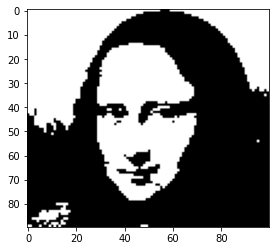

In [3]:
mona = visualiser('mona')

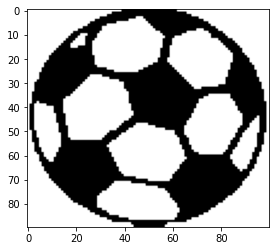

In [4]:
ball = visualiser('ball')

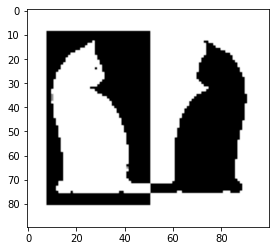

In [5]:
cat = visualiser('cat')

In [6]:
# changing the shape of arrays from 90 x 100 to a vector of shape 9000 x 1

mona_reshape = np.reshape(mona,(9000,1))
ball_reshape = np.reshape(ball,(9000,1))
cat_reshape = np.reshape(cat,(9000,1))

### Hopfield Network

In [7]:
class Hopfield_Network():
    def __init__(self,niter):
        self.weights = np.zeros((9000,9000))
        self.V = np.zeros((9000,1))
        self.U = np.zeros((9000,1))
        self.U_d = np.zeros((9000,1))
        self.rmse = np.zeros((niter,1))
        self.timekeeper = np.zeros((niter,1))
        # for leading images
        self.tracker = 0
        
    def weights_loader(self,image_reshape):

        if self.tracker==1:
            print('Loading the images')
            self.weights = np.matmul(mona_reshape,mona_reshape.T) + np.matmul(ball_reshape,ball_reshape.T)
            + np.matmul(cat_reshape,cat_reshape.T)
        if self.tracker==0:
            print('Loading the image')
            self.weights = np.matmul(image_reshape,image_reshape.T)
        
    def image_loader(self,image):
    
        new_image = np.zeros((90,100))
        new_image[0:45,20:65] = image[0:45,20:65]
        return new_image
        
    def damage_weights(self,p):
        
        # p is the probability with which weights are damaged
        
        indcs = np.random.randint(0,9000*9000-1,int(9000*9000*p))
        damaged_weights = np.copy(self.weights)
        damaged_weights = np.reshape(damaged_weights,(9000*9000,1))
        print('Altering the weights')
        for i in tqdm_notebook(range(len(indcs))):
            damaged_weights[indcs[i]] = 0
            
        damaged_weights = np.reshape(damaged_weights,(9000,9000))
        return damaged_weights

In [8]:
def demo(niter,image,image_reshape,lambdas,tracker,p):
    
    dt=1/100
    hopnet = Hopfield_Network(niter)
    hopnet.tracker = tracker
    hopnet.weights_loader(image_reshape)
    # for selecting the patch of an image just change the name in image_loader()
    hopnet.U = np.reshape(hopnet.image_loader(image),(9000,1))
    hopnet.weights = hopnet.damage_weights(p)
    hopnet.weights = hopnet.weights/9000
    picsarray = []
    start_time = time.time()
    
    for i in tqdm_notebook(range(niter)):
        hopnet.U_d = -hopnet.U + np.matmul(hopnet.weights,hopnet.V)
        hopnet.U = hopnet.U + (hopnet.U_d)*dt
        hopnet.V = np.tanh(lambdas*hopnet.U)
        hopnet.rmse[i] = sqrt(mean_squared_error(image_reshape,hopnet.V))
        hopnet.timekeeper[i] = time.time()-start_time
        img = np.reshape(hopnet.V,(90,100))
        picsarray.append(img)
    picsarray=np.array(picsarray)
    return picsarray,hopnet.rmse,hopnet.timekeeper

In [12]:
def display(picsarray,rmse,timekeeper,niter,p):
    picsarray=np.array(picsarray)
    for i in range(int(niter/10)):
        plt.imshow(picsarray[10*i,:,:],'Greys_r')
        plt.title(f'{10*i}th Iteration | X={p*100}% of weights are Zero')
        plt.show()
        
    plt.plot(timekeeper,rmse)
    plt.xlabel('Time in seconds')
    plt.ylabel('RMS Error')
    plt.grid()
    plt.show()

### Code for Problem 2:

Loading the image
Altering the weights


0it [00:00, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

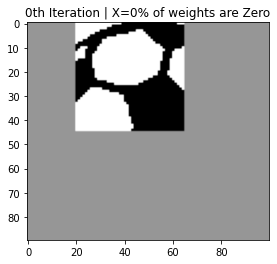

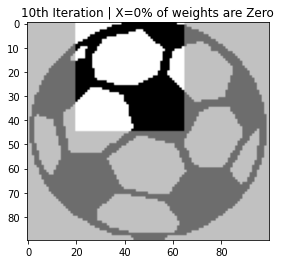

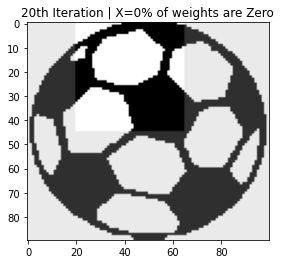

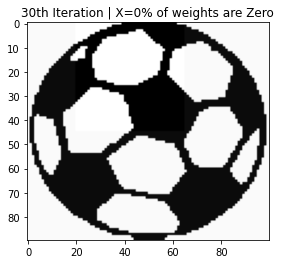

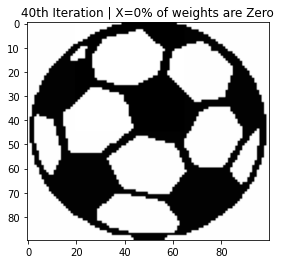

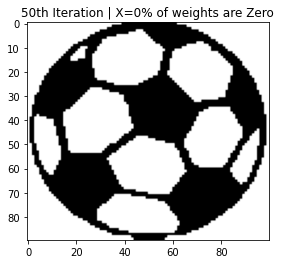

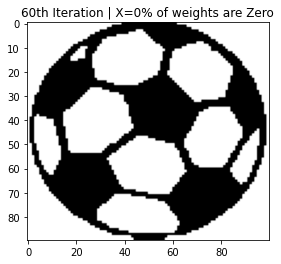

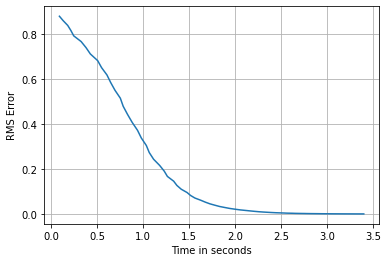

In [13]:
niter=70
#images with 0% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,ball,ball_reshape,10,0,0)
display(picsarray,rmse,timekeeper,niter,0) 

### Code for Problem 3 (a) and 3 (b)

Loading the images
Altering the weights


0it [00:00, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

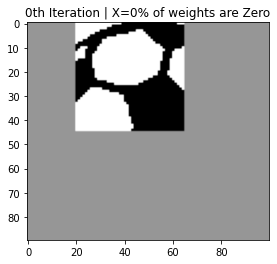

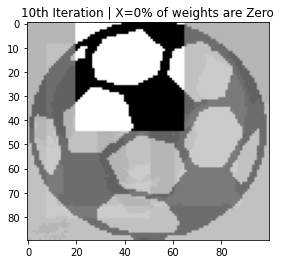

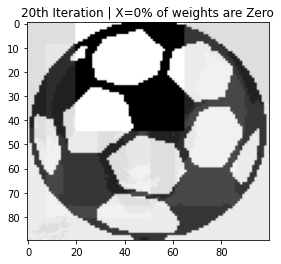

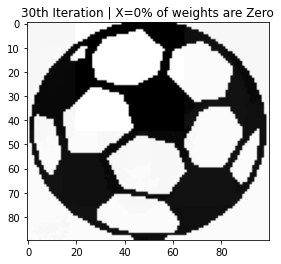

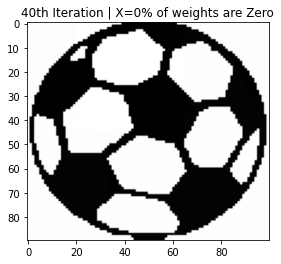

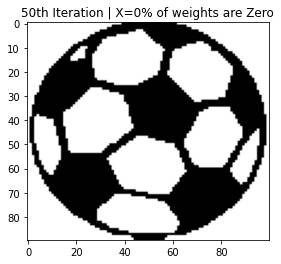

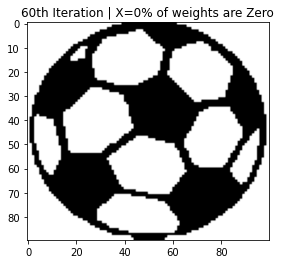

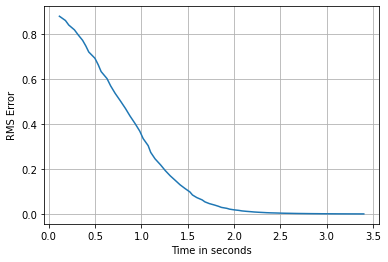

In [14]:
niter=70
#images with 0% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,ball,ball_reshape,10,1,0)
display(picsarray,rmse,timekeeper,niter,0) 

Loading the images
Altering the weights


0it [00:00, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

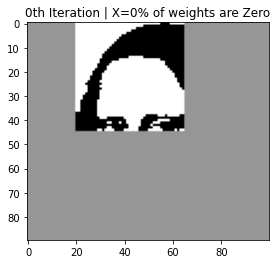

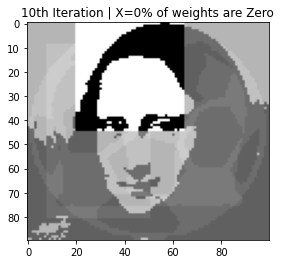

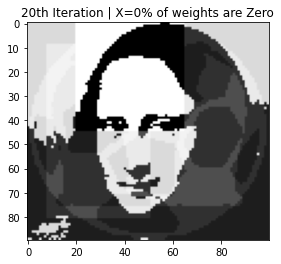

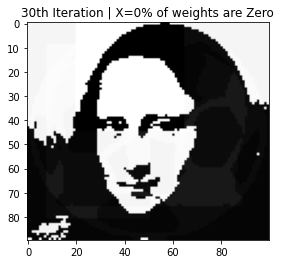

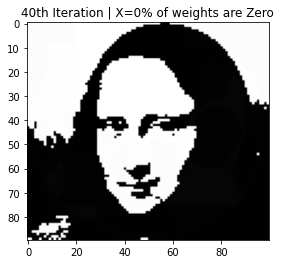

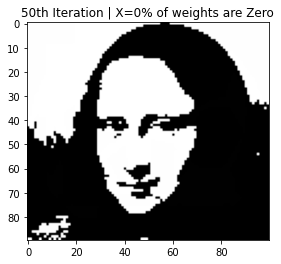

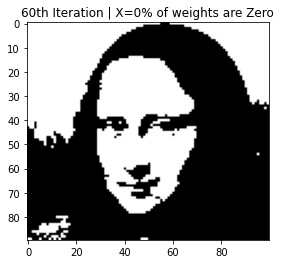

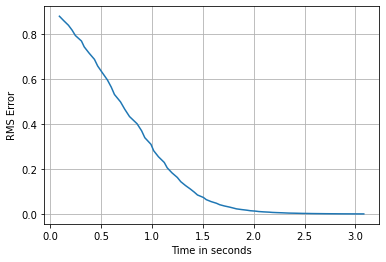

In [15]:
niter=70
#images with 0% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,mona,mona_reshape,10,1,0)
display(picsarray,rmse,timekeeper,niter,0) 

Loading the images
Altering the weights


0it [00:00, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

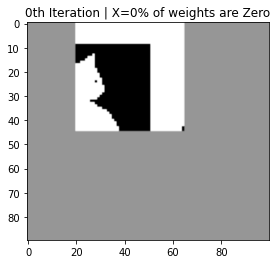

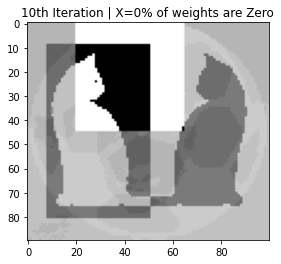

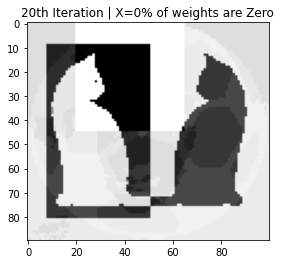

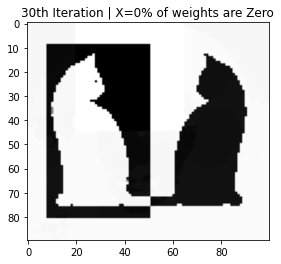

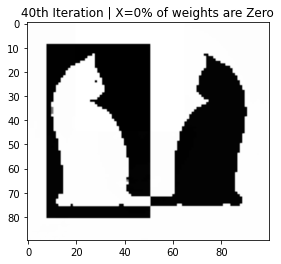

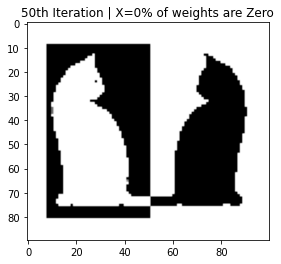

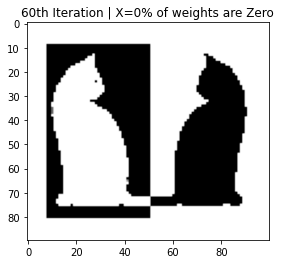

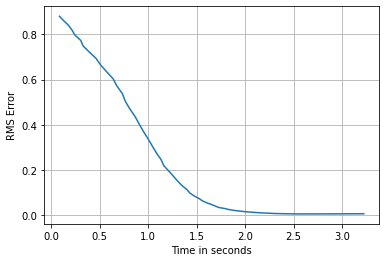

In [16]:
niter=70
#images with 0% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,cat,cat_reshape,10,1,0)
display(picsarray,rmse,timekeeper,niter,0) 

### Code for Problem 3 (c)[i] and 3 (c)[ii]

#### Mona Lisa

Loading the images
Altering the weights


  0%|          | 0/20250000 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

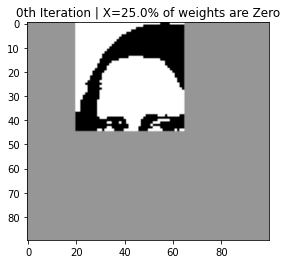

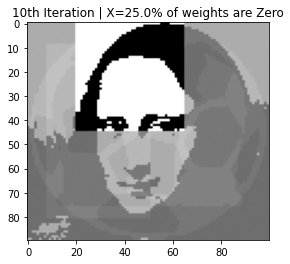

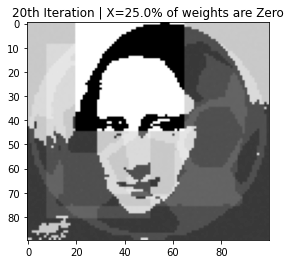

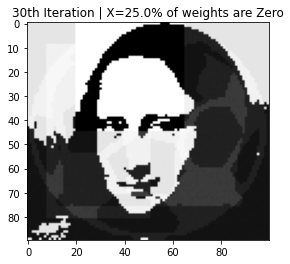

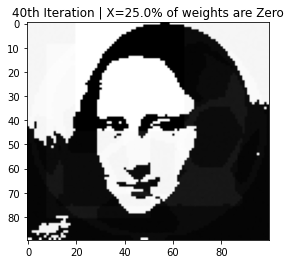

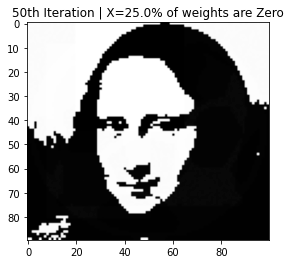

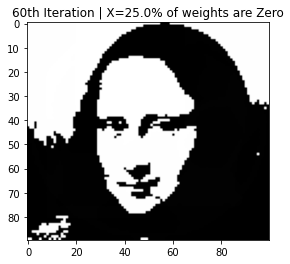

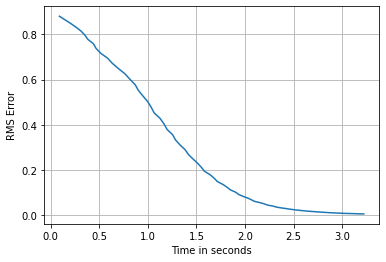

In [17]:
niter=70
#images with 25% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,mona,mona_reshape,10,1,0.25)
display(picsarray,rmse,timekeeper,niter,0.25) 

Loading the images
Altering the weights


  0%|          | 0/40500000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

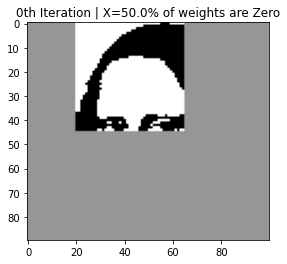

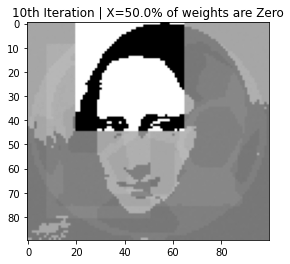

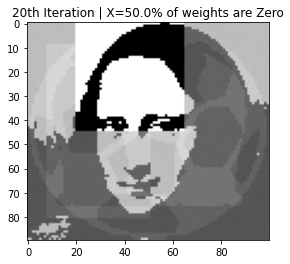

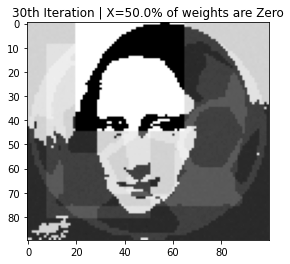

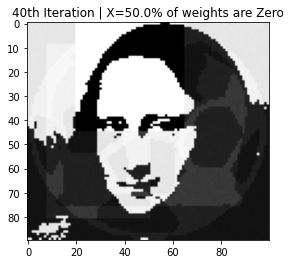

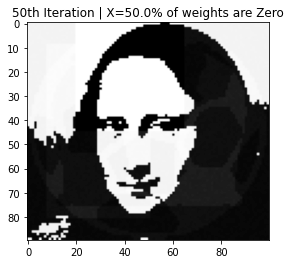

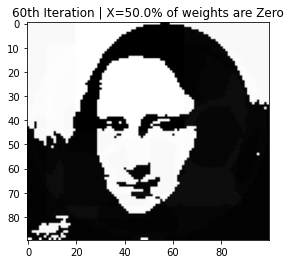

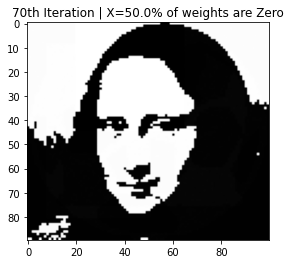

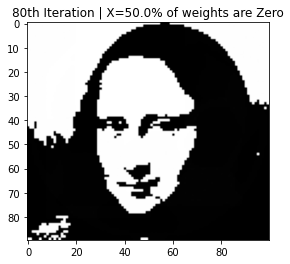

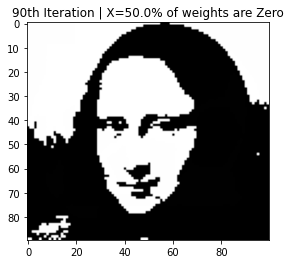

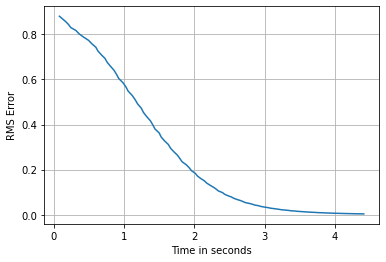

In [18]:
niter=100
#images with 50% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,mona,mona_reshape,10,1,0.50)
display(picsarray,rmse,timekeeper,niter,0.50)

Loading the images
Altering the weights


  0%|          | 0/64800000 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

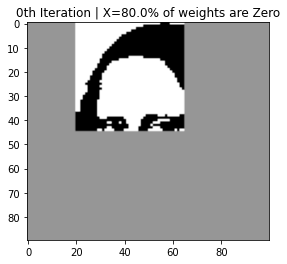

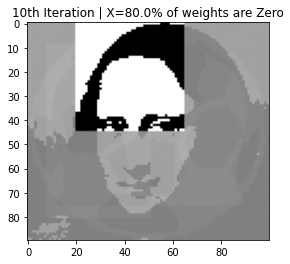

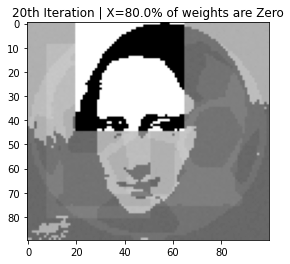

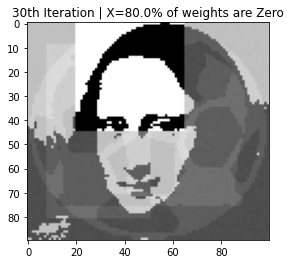

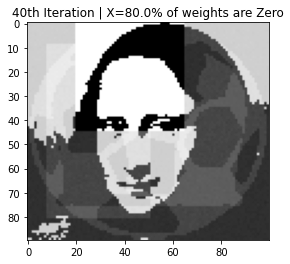

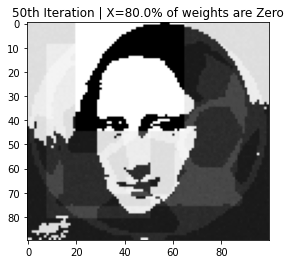

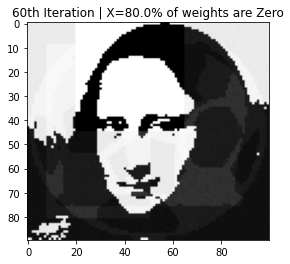

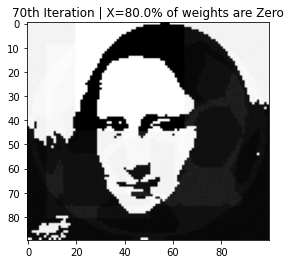

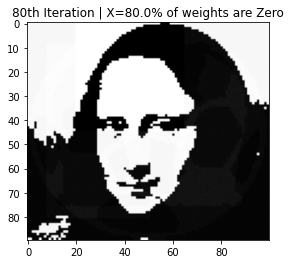

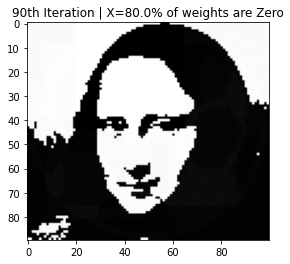

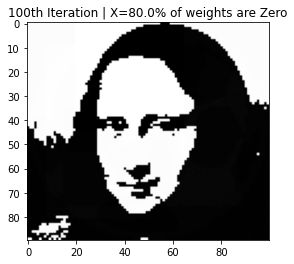

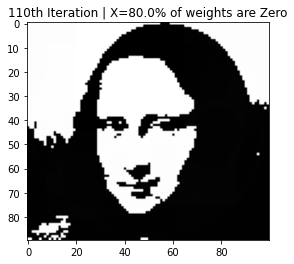

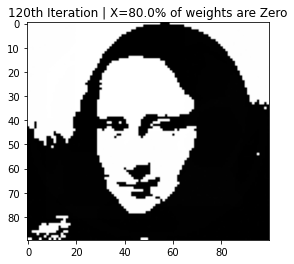

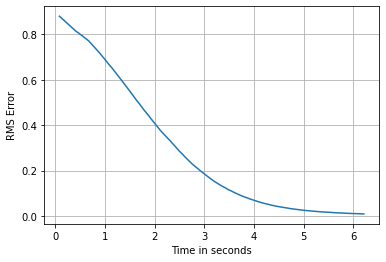

In [19]:
niter=130
#images with 80% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,mona,mona_reshape,10,1,0.80)
display(picsarray,rmse,timekeeper,niter,0.80)

#### Ball

Loading the images
Altering the weights


  0%|          | 0/20250000 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

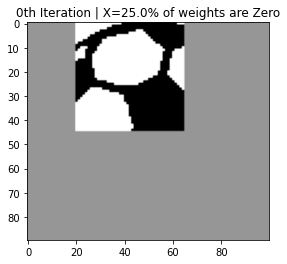

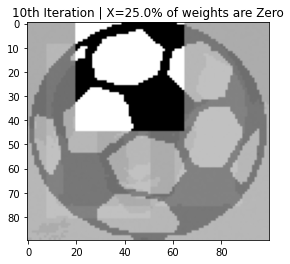

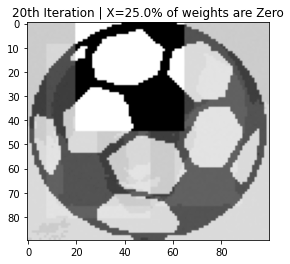

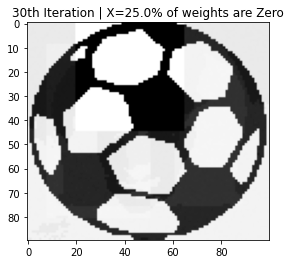

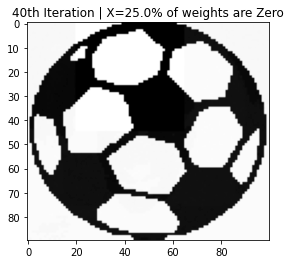

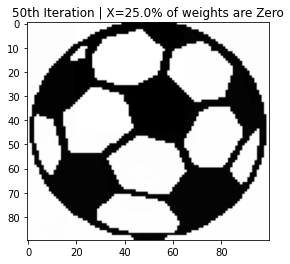

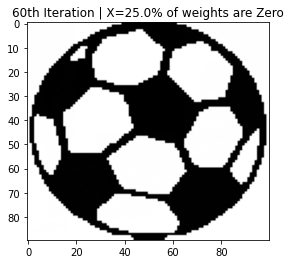

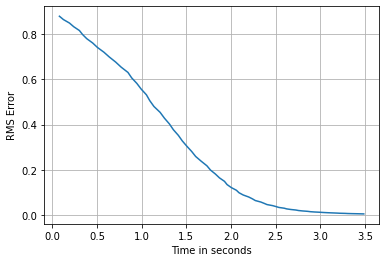

In [20]:
niter=70
#images with 25% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,ball,ball_reshape,10,1,0.25)
display(picsarray,rmse,timekeeper,niter,0.25)

Loading the images
Altering the weights


  0%|          | 0/40500000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

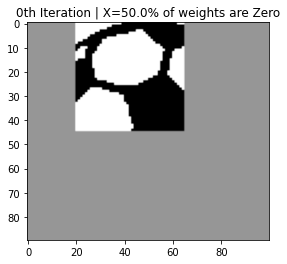

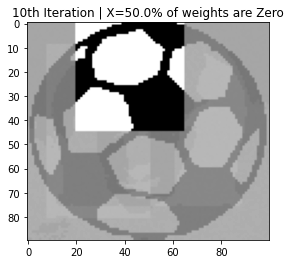

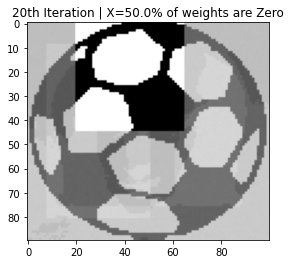

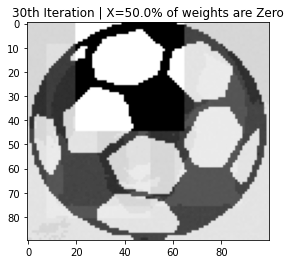

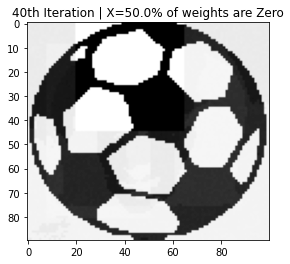

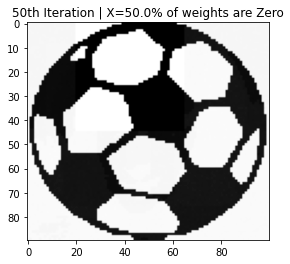

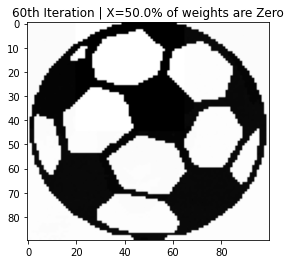

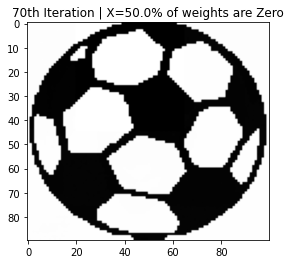

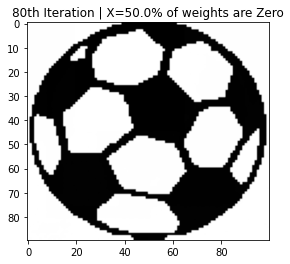

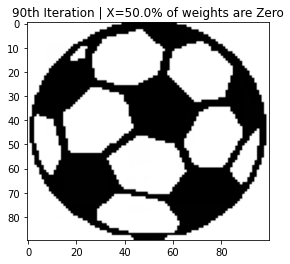

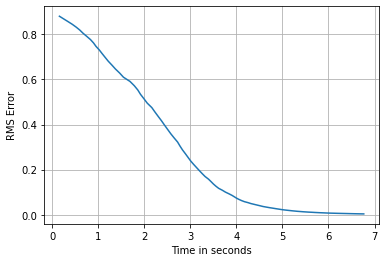

In [21]:
niter=100
#images with 50% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,ball,ball_reshape,10,1,0.50)
display(picsarray,rmse,timekeeper,niter,0.50)

Loading the images
Altering the weights


  0%|          | 0/64800000 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

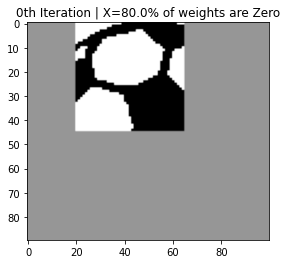

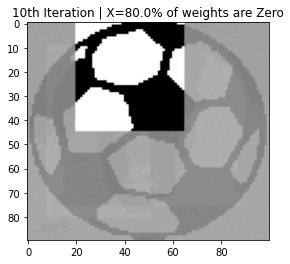

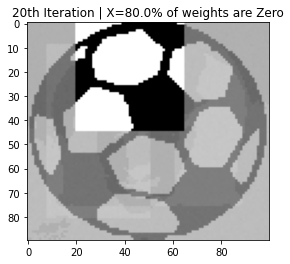

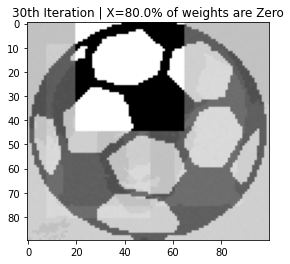

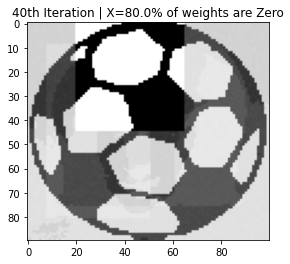

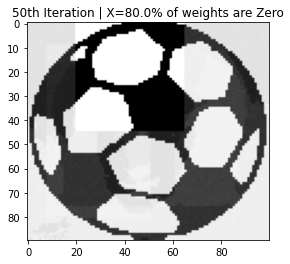

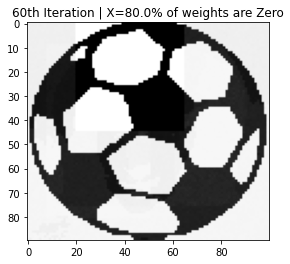

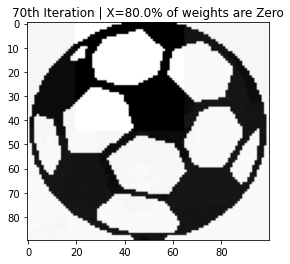

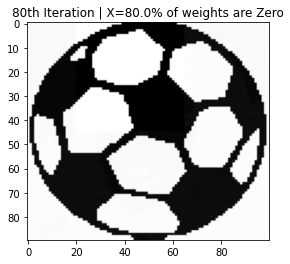

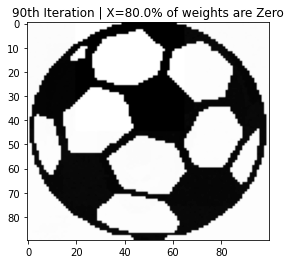

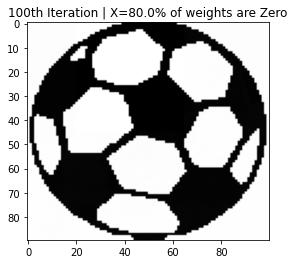

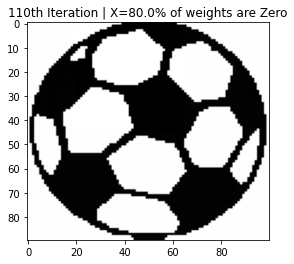

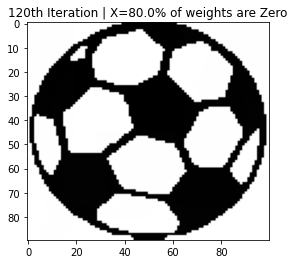

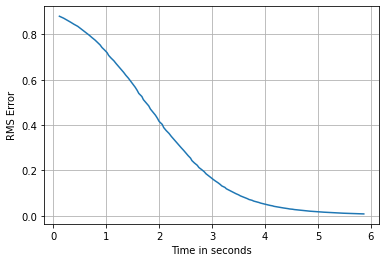

In [22]:
niter=130
#images with 80% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,ball,ball_reshape,10,1,0.80)
display(picsarray,rmse,timekeeper,niter,0.80)

#### Cat

Loading the images
Altering the weights


  0%|          | 0/20250000 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

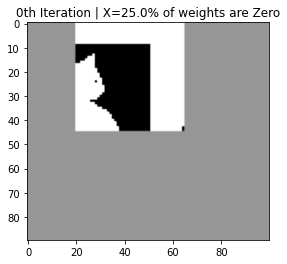

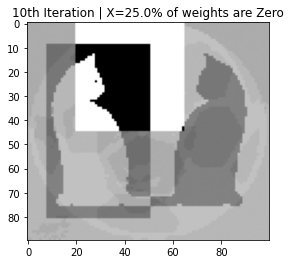

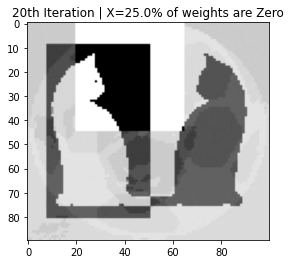

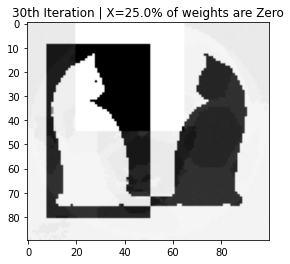

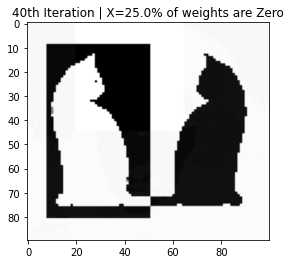

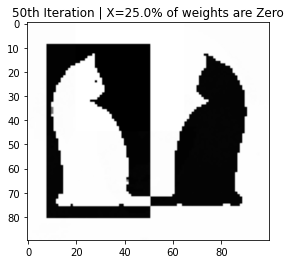

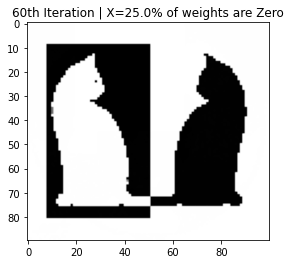

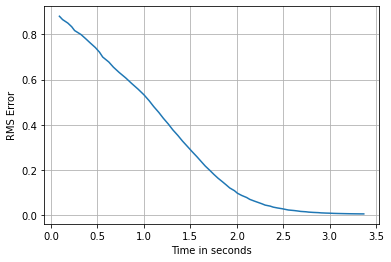

In [23]:
niter=70
#images with 25% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,cat,cat_reshape,10,1,0.25)
display(picsarray,rmse,timekeeper,niter,0.25)

Loading the images
Altering the weights


  0%|          | 0/40500000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

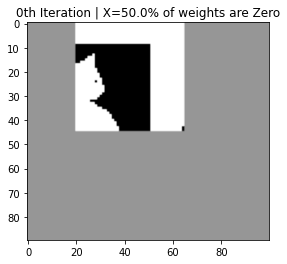

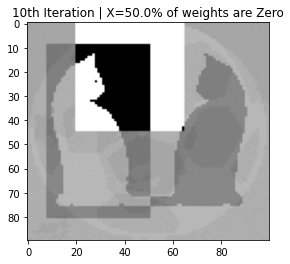

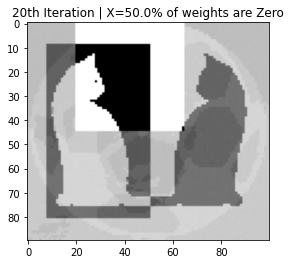

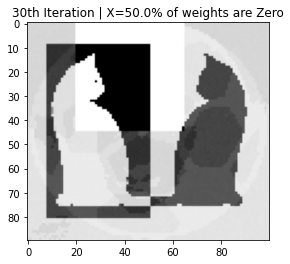

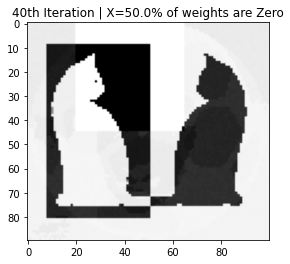

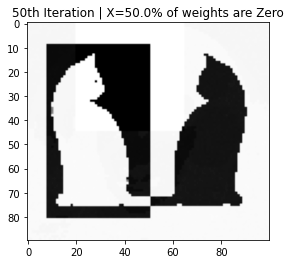

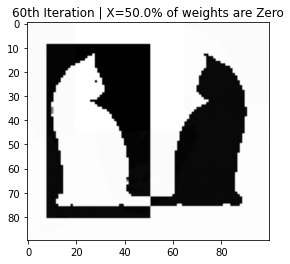

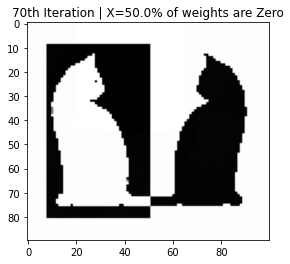

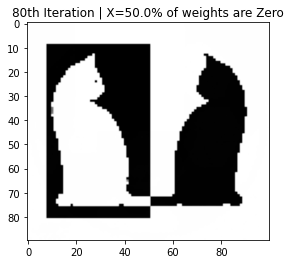

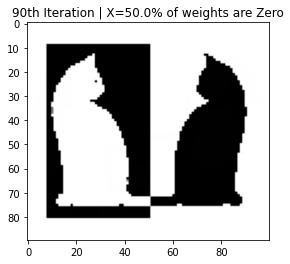

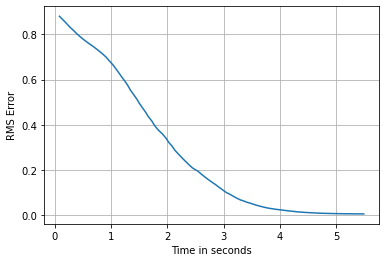

In [24]:
niter=100
#images with 50% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,cat,cat_reshape,10,1,0.50)
display(picsarray,rmse,timekeeper,niter,0.50)

Loading the images
Altering the weights


  0%|          | 0/64800000 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

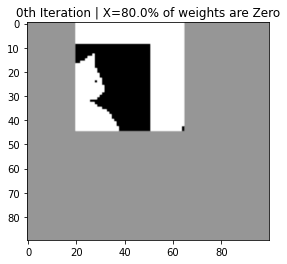

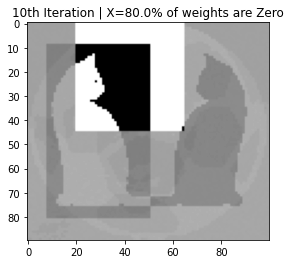

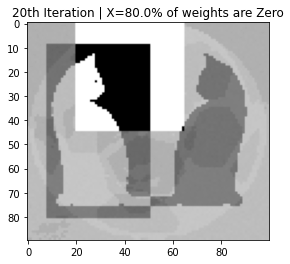

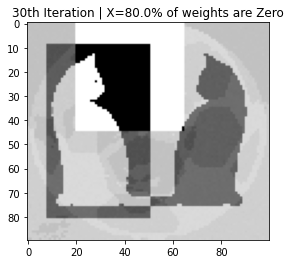

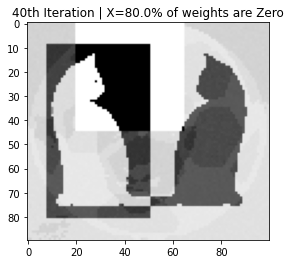

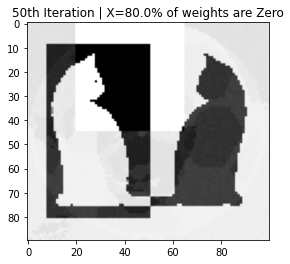

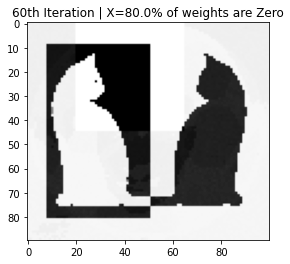

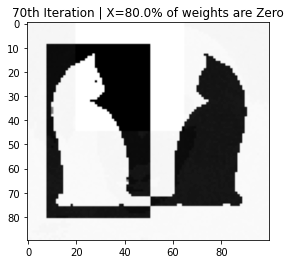

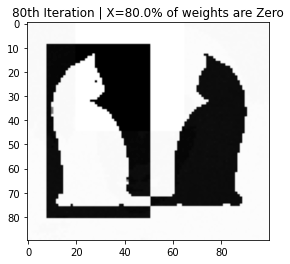

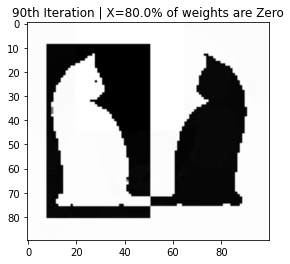

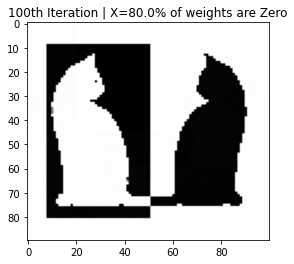

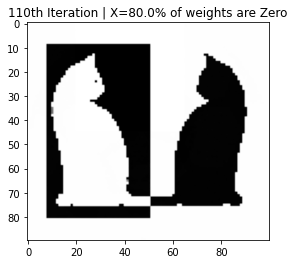

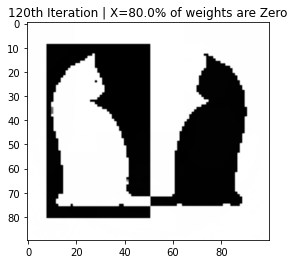

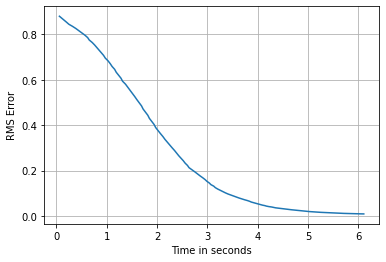

In [25]:
niter=130
#images with 80% diff and ploting image and iteration
picsarray,rmse,timekeeper = demo(niter,cat,cat_reshape,10,1,0.80)
display(picsarray,rmse,timekeeper,niter,0.80)

### End of assignment